#1. Buat dataset make_moons & normalisasi

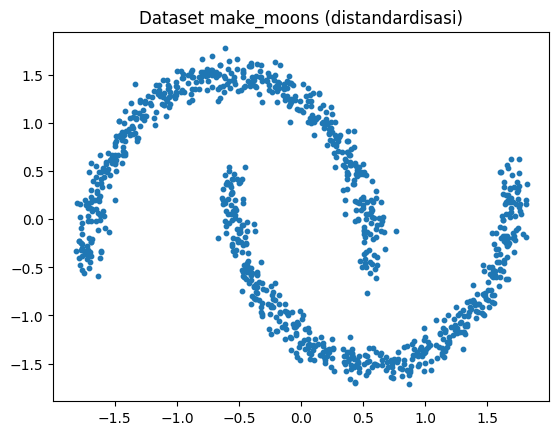

In [1]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Dataset moons
X, labels_true = make_moons(n_samples=1000, noise=0.05, random_state=0)

# Normalisasi
X = StandardScaler().fit_transform(X)

# Visualisasi awal
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Dataset make_moons (distandardisasi)")
plt.show()


#2. DBSCAN dasar (eps=0.2, min_samples=5)

In [2]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

# Hitung cluster & noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points:", n_noise_)


Estimated number of clusters: 2
Estimated number of noise points: 0


#3. Evaluasi kualitas clustering

In [4]:
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))

# Silhouette hanya bisa dihitung jika cluster > 1
if n_clusters_ > 1:
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))


Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392


#4. Visualisasi hasil DBSCAN

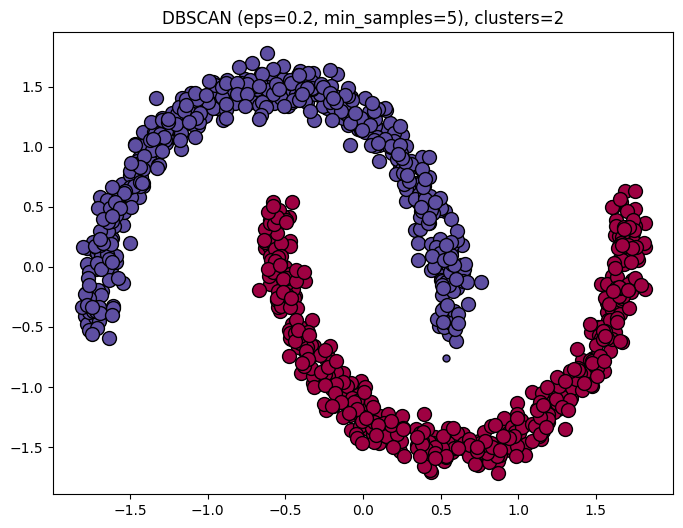

In [5]:
import numpy as np

# Mask core sample
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Noise = hitam

    class_member_mask = (labels == k)

    # Core sample besar
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col),
             markeredgecolor="k", markersize=10)

    # Non-core kecil
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col),
             markeredgecolor="k", markersize=5)

plt.title(f"DBSCAN (eps=0.2, min_samples=5), clusters={n_clusters_}")
plt.show()


#5. Eksperimen parameter

Gunakan loop untuk mencoba berbagai kombinasi eps dan min_samples.

In [6]:
eps_values = [0.05, 0.1, 0.2, 0.3, 0.5]
min_samples_values = [3, 5, 10, 20]

results = []

for eps in eps_values:
    for ms in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=ms).fit(X)
        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        # Evaluasi (hati-hati Silhouette)
        if n_clusters_ > 1:
            silhouette = metrics.silhouette_score(X, labels)
        else:
            silhouette = -1  # Tidak bisa dihitung

        results.append({
            "eps": eps,
            "min_samples": ms,
            "clusters": n_clusters_,
            "noise": n_noise_,
            "homogeneity": metrics.homogeneity_score(labels_true, labels),
            "completeness": metrics.completeness_score(labels_true, labels),
            "v_measure": metrics.v_measure_score(labels_true, labels),
            "ARI": metrics.adjusted_rand_score(labels_true, labels),
            "AMI": metrics.adjusted_mutual_info_score(labels_true, labels),
            "silhouette": silhouette
        })

import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)


     eps  min_samples  clusters  noise  homogeneity  completeness  v_measure  \
0   0.05            3        67    197     0.803825      0.154915   0.259767   
1   0.05            5        51    444     0.556006      0.137314   0.220237   
2   0.05           10         0   1000     0.000000      1.000000   0.000000   
3   0.05           20         0   1000     0.000000      1.000000   0.000000   
4   0.10            3         3     18     0.983471      0.708395   0.823571   
5   0.10            5         3     21     0.980716      0.699589   0.816635   
6   0.10           10         9     63     0.938949      0.358282   0.518656   
7   0.10           20         6    844     0.157108      0.153385   0.155224   
8   0.20            3         2      0     1.000000      1.000000   1.000000   
9   0.20            5         2      0     1.000000      1.000000   1.000000   
10  0.20           10         2      0     1.000000      1.000000   1.000000   
11  0.20           20         2      5  